# Fraud detection using credit card transaction data

**1. Load the dataset**



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
import warnings
warnings.filterwarnings("ignore")
sns.set(rc={'figure.figsize':(10,6)})
pd.set_option('display.max_rows', 500)

In [2]:
# Top 3 rows
with open('/content/drive/MyDrive/data1/transactions.txt') as f:
    i=1
    for x in f:
      i+=1      
      print(x.rstrip())
      if (i > 3):
        break

{"accountNumber": "737265056", "customerId": "737265056", "creditLimit": 5000.0, "availableMoney": 5000.0, "transactionDateTime": "2016-08-13T14:27:32", "transactionAmount": 98.55, "merchantName": "Uber", "acqCountry": "US", "merchantCountryCode": "US", "posEntryMode": "02", "posConditionCode": "01", "merchantCategoryCode": "rideshare", "currentExpDate": "06/2023", "accountOpenDate": "2015-03-14", "dateOfLastAddressChange": "2015-03-14", "cardCVV": "414", "enteredCVV": "414", "cardLast4Digits": "1803", "transactionType": "PURCHASE", "echoBuffer": "", "currentBalance": 0.0, "merchantCity": "", "merchantState": "", "merchantZip": "", "cardPresent": false, "posOnPremises": "", "recurringAuthInd": "", "expirationDateKeyInMatch": false, "isFraud": false}
{"accountNumber": "737265056", "customerId": "737265056", "creditLimit": 5000.0, "availableMoney": 5000.0, "transactionDateTime": "2016-10-11T05:05:54", "transactionAmount": 74.51, "merchantName": "AMC #191138", "acqCountry": "US", "merchan

In [3]:
# Load data and transform it to a dataframe
data = []
with open('/content/drive/MyDrive/Vic_ML_20201104/data/transactions.txt') as f:
    for x in f:
        data.append(json.loads(x))

df = pd.DataFrame(data)

del data

In [4]:
df.to_csv('creditcard.csv') 

In [5]:
df.head(100)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000.0,5000.00,2016-08-13T14:27:32,98.55,Uber,US,US,02,01,rideshare,06/2023,2015-03-14,2015-03-14,414,414,1803,PURCHASE,,0.00,,,,False,,,False,False
1,737265056,737265056,5000.0,5000.00,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,01,entertainment,02/2024,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.00,,,,True,,,False,False
2,737265056,737265056,5000.0,5000.00,2016-11-08T09:18:39,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.00,,,,False,,,False,False
3,737265056,737265056,5000.0,5000.00,2016-12-10T02:14:50,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.00,,,,False,,,False,False
4,830329091,830329091,5000.0,5000.00,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,01,fastfood,10/2029,2015-08-06,2015-08-06,885,885,3143,PURCHASE,,0.00,,,,True,,,False,False
5,830329091,830329091,5000.0,5000.00,2016-04-19T16:24:27,30.76,In-N-Out #422833,US,US,02,01,fastfood,01/2020,2015-08-06,2015-08-06,885,885,3143,PURCHASE,,0.00,,,,True,,,False,False
6,830329091,830329091,5000.0,5000.00,2016-05-21T14:50:35,57.28,Krispy Kreme #685312,US,US,02,01,fastfood,05/2020,2015-08-06,2015-08-06,885,885,3143,PURCHASE,,0.00,,,,True,,,False,False
7,830329091,830329091,5000.0,5000.00,2016-06-03T00:31:21,9.37,Shake Shack #968081,US,US,05,01,fastfood,01/2021,2015-08-06,2015-08-06,885,885,3143,PURCHASE,,0.00,,,,True,,,False,False
8,830329091,830329091,5000.0,4990.63,2016-06-10T01:21:46,523.67,Burger King #486122,,US,02,01,fastfood,08/2032,2015-08-06,2015-08-06,885,885,3143,PURCHASE,,9.37,,,,True,,,False,False
9,830329091,830329091,5000.0,5000.00,2016-07-11T10:47:16,164.37,Five Guys #510989,US,US,05,08,fastfood,04/2020,2015-08-06,2015-08-06,885,885,3143,PURCHASE,,0.00,,,,True,,,False,False


In [6]:
df.shape

(786363, 29)

In [7]:
df.describe(include='all')

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
count,786363,786363,786363.000000,786363.000000,786363,786363.000000,786363,786363,786363,786363,786363,786363,786363,786363,786363,786363,786363,786363,786363,786363,786363.000000,786363,786363,786363,786363,786363,786363,786363,786363
unique,5000,5000,NaN,NaN,776637,NaN,2490,5,5,6,4,19,165,1820,2184,899,976,5246,4,1,NaN,1,1,1,2,1,1,2,2
top,380680241,380680241,NaN,NaN,2016-05-28T14:24:41,NaN,Uber,US,US,05,01,online_retail,03/2029,2014-06-21,2016-03-15,869,869,593,PURCHASE,,NaN,,,,False,,,False,False
freq,32850,32850,NaN,NaN,4,NaN,25613,774709,778511,315035,628787,202156,5103,33623,3819,33749,33424,32946,745193,786363,NaN,786363,786363,786363,433495,786363,786363,785320,773946
mean,NaN,NaN,10759.464459,6250.725369,NaN,136.985791,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4508.739089,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,11636.174890,8880.783989,NaN,147.725569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6457.442068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,250.000000,-1005.630000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,5000.000000,1077.420000,NaN,33.650000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,689.910000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,7500.000000,3184.860000,NaN,87.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2451.760000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,15000.000000,7500.000000,NaN,191.480000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5291.095000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**2 Data Visualization**

**2.1 "isFraud" (Response variable)**

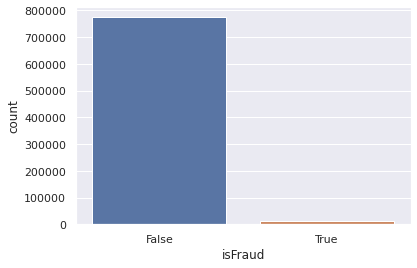

In [8]:
sns.countplot(data = df, x = 'isFraud')

In [9]:
print(df['isFraud'].value_counts())
print(df['isFraud'].mean())

False    773946
True      12417
Name: isFraud, dtype: int64
0.01579041740264992


I will use 1.6% as the threshold for the classification model.

**2.2 Column "transactionAmount"**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdce4742e50>]],
      dtype=object)

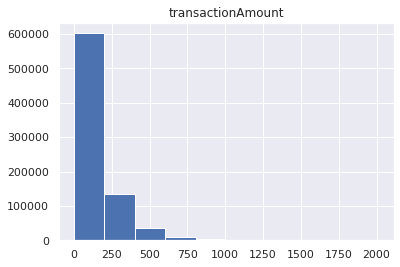

In [10]:
df.hist(column='transactionAmount')

In [11]:
df['transactionAmount'].describe()

count    786363.000000
mean        136.985791
std         147.725569
min           0.000000
25%          33.650000
50%          87.900000
75%         191.480000
max        2011.540000
Name: transactionAmount, dtype: float64

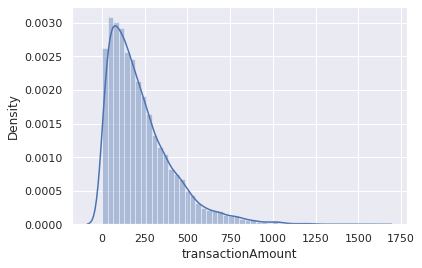

In [12]:
sns.distplot(df[df['isFraud']]['transactionAmount'])

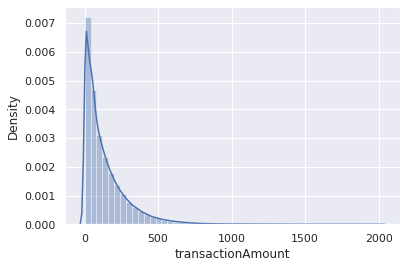

In [13]:
sns.distplot(df[~df['isFraud']]['transactionAmount'])

It seems like "transationAmount" has an impact on whether it is a fraud.

**2.3 Column "posEntryMode"** 

In [14]:
df['posEntryMode'].value_counts()

05    315035
09    236481
02    195934
90     19576
80     15283
        4054
Name: posEntryMode, dtype: int64

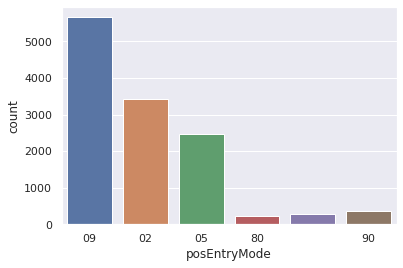

In [15]:
sns.countplot(data = df[df['isFraud']], x = 'posEntryMode')

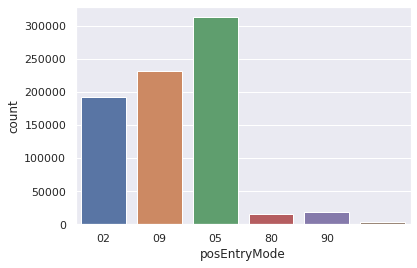

In [16]:
sns.countplot(data = df[~df['isFraud']], x = 'posEntryMode')

From the above 2 plots, it seems like "posEntryMode" has a influence on whether it is a fraud or not.

**2.4 Column "currentBalance"**

In [17]:
df['currentBalance'].value_counts()

0.00        33678
8.46           26
5.67           19
29.42          19
59.68          18
            ...  
4167.11         1
2550.33         1
10824.85        1
3981.23         1
6830.15         1
Name: currentBalance, Length: 487318, dtype: int64

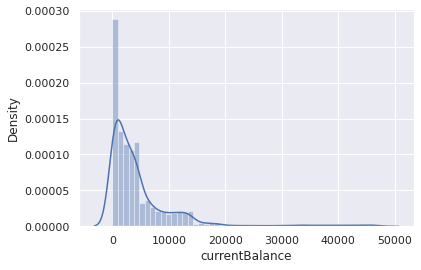

In [18]:
sns.distplot(df[df['isFraud']]['currentBalance'])

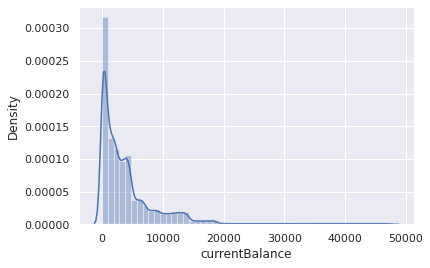

In [19]:
sns.distplot(df[~df['isFraud']]['currentBalance'])

Since 2 graphs are similar, there is probably weak relation between "currentBalance" and "isFraud".

**2.5 Column "creditLimit"**

In [20]:
df['creditLimit'].describe()

count    786363.000000
mean      10759.464459
std       11636.174890
min         250.000000
25%        5000.000000
50%        7500.000000
75%       15000.000000
max       50000.000000
Name: creditLimit, dtype: float64

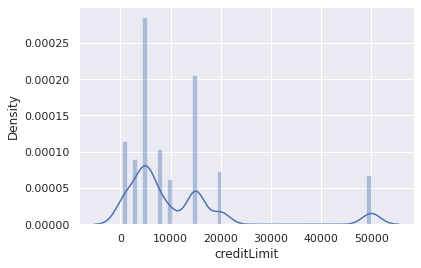

In [21]:
sns.distplot(df[df['isFraud']]['creditLimit'])

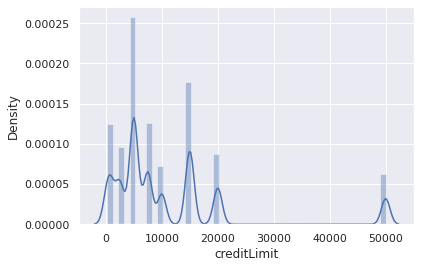

In [22]:
sns.distplot(df[~df['isFraud']]['creditLimit'])

It is highly likely that "creditLimit" has an influence on the response variable.

**2.5 Column "cardPresent"**

In [23]:
df['cardPresent'].value_counts()

False    433495
True     352868
Name: cardPresent, dtype: int64

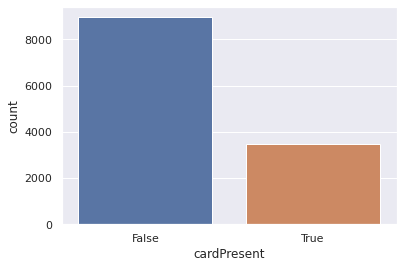

In [24]:
sns.countplot(data = df[df['isFraud']], x = 'cardPresent')

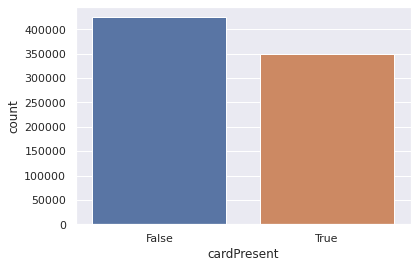

In [25]:
sns.countplot(data = df[~df['isFraud']], x = 'cardPresent')

The "cardPresent" column has an impact on whether it is a fraud.

**3 Data Wrangling - Duplicate Transactions**

**3.1 remove "0" transation amount**

In [26]:
df['transactionAmount'].value_counts()

0.00      22225
8.21        132
49.30       125
8.81        124
4.39        120
          ...  
686.94        1
520.32        1
370.19        1
729.82        1
470.44        1
Name: transactionAmount, Length: 66038, dtype: int64

In [27]:
df_clean = df[df['transactionAmount']!=0]
df_clean

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000.0,5000.00,2016-08-13T14:27:32,98.55,Uber,US,US,02,01,rideshare,06/2023,2015-03-14,2015-03-14,414,414,1803,PURCHASE,,0.00,,,,False,,,False,False
1,737265056,737265056,5000.0,5000.00,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,01,entertainment,02/2024,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.00,,,,True,,,False,False
2,737265056,737265056,5000.0,5000.00,2016-11-08T09:18:39,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.00,,,,False,,,False,False
3,737265056,737265056,5000.0,5000.00,2016-12-10T02:14:50,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.00,,,,False,,,False,False
4,830329091,830329091,5000.0,5000.00,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,01,fastfood,10/2029,2015-08-06,2015-08-06,885,885,3143,PURCHASE,,0.00,,,,True,,,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,732852505,732852505,50000.0,48904.96,2016-12-22T18:44:12,119.92,Lyft,US,US,90,01,rideshare,12/2022,2012-08-23,2012-08-23,936,936,3783,PURCHASE,,1095.04,,,,False,,,False,False
786359,732852505,732852505,50000.0,48785.04,2016-12-25T16:20:34,18.89,hulu.com,US,US,09,01,online_subscriptions,08/2023,2012-08-23,2012-08-23,939,939,3388,PURCHASE,,1214.96,,,,False,,,False,False
786360,732852505,732852505,50000.0,48766.15,2016-12-27T15:46:24,49.43,Lyft,US,US,02,01,rideshare,08/2025,2012-08-23,2012-08-23,936,936,3783,PURCHASE,,1233.85,,,,False,,,False,False
786361,732852505,732852505,50000.0,48716.72,2016-12-29T00:30:55,49.89,walmart.com,US,US,09,99,online_retail,07/2022,2012-08-23,2012-08-23,939,939,3388,PURCHASE,,1283.28,,,,False,,,False,False


**3.2 remove duplicate transation**

Assume the records with same transaction amount and accountnumber within 2 minutes are the duplicate transations

In [28]:
# transfrom to datetime data type
df_clean['transactionDateTime']= pd.to_datetime(df_clean['transactionDateTime'])
df_clean = df_clean.sort_values(by='transactionDateTime',ascending=True)
df_clean.head(100)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
640789,419104777,419104777,50000.0,50000.00,2016-01-01 00:01:02,44.09,Washington Post,US,US,09,01,subscriptions,03/2028,2015-05-30,2015-05-30,837,837,5010,PURCHASE,,0.00,,,,False,,,False,False
28946,674577133,674577133,5000.0,5000.00,2016-01-01 00:01:44,329.57,staples.com,US,US,09,08,online_retail,10/2024,2015-08-19,2015-08-19,430,430,1693,PURCHASE,,0.00,,,,False,,,False,False
222211,958438658,958438658,20000.0,20000.00,2016-01-01 00:01:47,164.57,cheapfast.com,US,US,05,01,online_retail,04/2023,2013-07-20,2013-07-20,445,445,2062,PURCHASE,,0.00,,,,False,,,False,False
470320,851126461,851126461,10000.0,10000.00,2016-01-01 00:02:04,122.83,discount.com,US,US,02,08,online_retail,07/2025,2014-10-18,2014-10-18,667,667,7359,PURCHASE,,0.00,,,,False,,,False,False
727644,974901832,974901832,250.0,250.00,2016-01-01 00:03:47,24.56,staples.com,US,US,05,01,online_retail,05/2032,2012-05-29,2012-05-29,290,290,9744,PURCHASE,,0.00,,,,False,,,False,False
310263,811942128,811942128,5000.0,5000.00,2016-01-01 00:04:10,20.45,sears.com,US,US,02,01,online_retail,08/2029,2015-05-23,2015-05-23,948,948,4888,PURCHASE,,0.00,,,,False,,,False,True
240190,380680241,380680241,5000.0,5000.00,2016-01-01 00:06:17,96.68,Fresh Flowers,US,US,05,01,online_gifts,08/2023,2014-06-21,2014-06-21,869,869,593,PURCHASE,,0.00,,,,False,,,False,False
305450,676919786,676919786,250.0,250.00,2016-01-01 00:06:46,146.57,Dairy Queen #766986,US,US,05,01,fastfood,12/2020,2015-08-11,2015-08-11,111,111,3690,PURCHASE,,0.00,,,,True,,,False,False
622596,588383631,588383631,5000.0,5000.00,2016-01-01 00:07:03,227.62,discount.com,US,US,02,01,online_retail,09/2021,2012-11-15,2012-11-15,792,792,557,PURCHASE,,0.00,,,,False,,,False,False
167079,225678947,225678947,2500.0,2500.00,2016-01-01 00:09:07,44.73,Domino's Pizza #55020,US,US,05,01,fastfood,09/2026,2014-05-22,2014-05-22,889,889,9029,PURCHASE,,0.00,,,,True,,,False,False


In [29]:
df_clean['Duplicated?'] = (df_clean.sort_values(['transactionDateTime'])
                       .groupby(['accountNumber', 'transactionAmount'], sort=False)['transactionDateTime']
                       .diff()
                       .dt.total_seconds()
                       .lt(120))
df_clean

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud,Duplicated?
640789,419104777,419104777,50000.0,50000.00,2016-01-01 00:01:02,44.09,Washington Post,US,US,09,01,subscriptions,03/2028,2015-05-30,2015-05-30,837,837,5010,PURCHASE,,0.00,,,,False,,,False,False,False
28946,674577133,674577133,5000.0,5000.00,2016-01-01 00:01:44,329.57,staples.com,US,US,09,08,online_retail,10/2024,2015-08-19,2015-08-19,430,430,1693,PURCHASE,,0.00,,,,False,,,False,False,False
222211,958438658,958438658,20000.0,20000.00,2016-01-01 00:01:47,164.57,cheapfast.com,US,US,05,01,online_retail,04/2023,2013-07-20,2013-07-20,445,445,2062,PURCHASE,,0.00,,,,False,,,False,False,False
470320,851126461,851126461,10000.0,10000.00,2016-01-01 00:02:04,122.83,discount.com,US,US,02,08,online_retail,07/2025,2014-10-18,2014-10-18,667,667,7359,PURCHASE,,0.00,,,,False,,,False,False,False
727644,974901832,974901832,250.0,250.00,2016-01-01 00:03:47,24.56,staples.com,US,US,05,01,online_retail,05/2032,2012-05-29,2012-05-29,290,290,9744,PURCHASE,,0.00,,,,False,,,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472383,690351684,690351684,7500.0,6007.68,2016-12-30 23:57:33,128.84,EZ Putt Putt #551896,US,US,09,01,entertainment,12/2032,2015-02-26,2015-02-26,380,380,6106,PURCHASE,,1492.32,,,,True,,,False,False,False
769872,365766122,365766122,7500.0,970.87,2016-12-30 23:58:25,49.47,alibaba.com,US,US,90,01,online_retail,07/2030,2015-01-19,2016-10-06,479,479,1194,PURCHASE,,6529.13,,,,False,,,False,False,False
624229,543902721,543902721,1000.0,767.70,2016-12-30 23:59:33,13.02,abc.com,US,US,05,08,online_subscriptions,02/2023,2012-02-11,2012-02-11,743,743,4157,PURCHASE,,232.30,,,,False,,,False,False,False
280484,912493707,912493707,5000.0,4991.10,2016-12-30 23:59:35,8.85,Play Store,US,US,09,08,mobileapps,03/2028,2012-09-28,2016-10-31,284,284,9972,PURCHASE,,8.90,,,,False,,,False,False,False


In [30]:
df_clean['Duplicated?'].sum()

8639

In [31]:
df_clean1 = df_clean[df_clean['Duplicated?']==False]
df_clean1

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud,Duplicated?
640789,419104777,419104777,50000.0,50000.00,2016-01-01 00:01:02,44.09,Washington Post,US,US,09,01,subscriptions,03/2028,2015-05-30,2015-05-30,837,837,5010,PURCHASE,,0.00,,,,False,,,False,False,False
28946,674577133,674577133,5000.0,5000.00,2016-01-01 00:01:44,329.57,staples.com,US,US,09,08,online_retail,10/2024,2015-08-19,2015-08-19,430,430,1693,PURCHASE,,0.00,,,,False,,,False,False,False
222211,958438658,958438658,20000.0,20000.00,2016-01-01 00:01:47,164.57,cheapfast.com,US,US,05,01,online_retail,04/2023,2013-07-20,2013-07-20,445,445,2062,PURCHASE,,0.00,,,,False,,,False,False,False
470320,851126461,851126461,10000.0,10000.00,2016-01-01 00:02:04,122.83,discount.com,US,US,02,08,online_retail,07/2025,2014-10-18,2014-10-18,667,667,7359,PURCHASE,,0.00,,,,False,,,False,False,False
727644,974901832,974901832,250.0,250.00,2016-01-01 00:03:47,24.56,staples.com,US,US,05,01,online_retail,05/2032,2012-05-29,2012-05-29,290,290,9744,PURCHASE,,0.00,,,,False,,,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472383,690351684,690351684,7500.0,6007.68,2016-12-30 23:57:33,128.84,EZ Putt Putt #551896,US,US,09,01,entertainment,12/2032,2015-02-26,2015-02-26,380,380,6106,PURCHASE,,1492.32,,,,True,,,False,False,False
769872,365766122,365766122,7500.0,970.87,2016-12-30 23:58:25,49.47,alibaba.com,US,US,90,01,online_retail,07/2030,2015-01-19,2016-10-06,479,479,1194,PURCHASE,,6529.13,,,,False,,,False,False,False
624229,543902721,543902721,1000.0,767.70,2016-12-30 23:59:33,13.02,abc.com,US,US,05,08,online_subscriptions,02/2023,2012-02-11,2012-02-11,743,743,4157,PURCHASE,,232.30,,,,False,,,False,False,False
280484,912493707,912493707,5000.0,4991.10,2016-12-30 23:59:35,8.85,Play Store,US,US,09,08,mobileapps,03/2028,2012-09-28,2016-10-31,284,284,9972,PURCHASE,,8.90,,,,False,,,False,False,False


In [32]:
df_clean1.to_csv('creditcard_clean.csv') 